## Parte 2- Exploración y Análisis de Datos

### **Introducción**:

En esta parte segunda parte, se realizarán las modificaciones necesarias al dataset para adaptarlo a las necesidades del proyecto, y se revisará y analizará como están distribuidas y relacionadas las variables entre sí.






In [0]:
# Cargando algunas librerias
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


In [0]:
# Cargamos del Dataset winequalityX2.csv 
wineX = pd.read_csv("/home/dsc/Data/winequalityX2.csv")

# Obtenemos una muestra de 20 registros
wineX.head(20)

**Comentario:** Con el objetivo de poder realizar una mejor comprensión en la fase de análisis, se modificarán los nombres de las columnas para adaptarlas a la terminología española.

In [0]:
# Renombramos los nombres de las columnas para adaptarlas 
# a los términos enológicos en español

wineX.rename(columns=
 {'type':'Tipo','fixed acidity':'Acidez_Fija', 
  'volatile acidity':'Acidez_Volatil','citric acid':'Acido_Citrico',
  'residual sugar':'Azucar_Residual','chlorides':'Cloruro',
  'free sulfur dioxide':'Dioxido_Azufre_Libre','total sulfur dioxide':'Dioxido_Azufre_Total',
  'density':'Densidad',
  'pH':'pH','sulphates':'Sulfatos',
  'alcohol':'Alcohol','quality':'Calidad'}, inplace=True)

In [0]:
# Comprobamos los cambios realizados
wineX.head(20)

,Acidez_Fija,Acidez_Volatil,Acido_Citrico,Azucar_Residual,Cloruro,Dioxido_Azufre_Libre,Dioxido_Azufre_Total,Densidad,pH,Sulfatos,Alcohol,Calidad
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [0]:
# Obtenemos un resumen estadistico
wineX.describe()

,Acidez_Fija,Acidez_Volatil,Acido_Citrico,Azucar_Residual,Cloruro,Dioxido_Azufre_Libre,Dioxido_Azufre_Total,Densidad,pH,Sulfatos,Alcohol,Calidad
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Comentarios:** Si miramos los datos obtenidos, podemos notar que:

- El valor promedio es mayor que el valor de la mediana (50%) para casi todas las columnas.
- Existente una diferencia notoriamente grande entre el 75% y el valor máximo para las columnas como: Azúcar_Residual, Sal, Dioxido_Sulfuro_Libres, y Dioxido_Sulfuro_Total.
- El 25% coincide con la media.
- El 50% coincide con el 75%.
- Las observaciones anteriores sugieren que existen valores extremos (outliers) en nuestro conjunto de datos. 

## Análisis general de todas las variables

Graficaremos algunas variables para observar mejor como están distribuidas y relacionadas entre sí.


In [0]:
# Librerias a emplear
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

**Calidad:**

In [0]:
# Posibles valores que tiene la columna 'Calidad' 
wineX['Calidad'].unique()

array([5, 6, 7, 4, 8, 3])

In [0]:
# Observamos la manera en la que están agrupados
wineX.Calidad.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: Calidad, dtype: int64

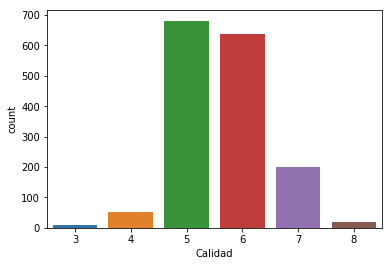

In [0]:
#Graficamos para ver mejor como es la distribución
sns.countplot(wineX['Calidad'])

**Comentarios:** Podemos ver que
- La variable dependiente 'Calidad' es discreta y de naturaleza categórica (varían de 3 a 8, donde 3 es malo y 8 es bueno).
- Se observa una calificación de calidad entre 3 y 8, es decir; los grados de calidad 1, 2, 9 y 10 no aparecen en el dataset.
- La mayor concentración de la calificación de calidad se concentra de 5 y 6, y la menor se concentra en las puntuaciones de 3 y 8. Las clases están ordenadas pero no están equilibradas (por ejemplo, hay más vinos normales que excelentes o pobres).
- Dado que la distribución de las muestras para los diferentes valores de calidad no es uniforme, se podría utilizar algún algoritmo de detección de 'Outliers' y retirarlos de nuestro dataset, o no eliminar ningún valor pero sí tenerlo en cuenta al dividir el conjunto de datos de entrenamiento y de validación.
- En este caso no eliminaremos los outliers, dado a que la creación de un vino es meramente una reacción química, y los valores extremos que se presentan son posibles. Podríamos pensar que dichos outliers pertenecen a vinos que tienen características muy diferentes al resto.

A continuación representaremos cada una de las otras columnas contra la variable objetivo "Calidad", para posteriormente analizar y obtener las primeras conclusiones:

**Ácidez Fija vs Calidad:**

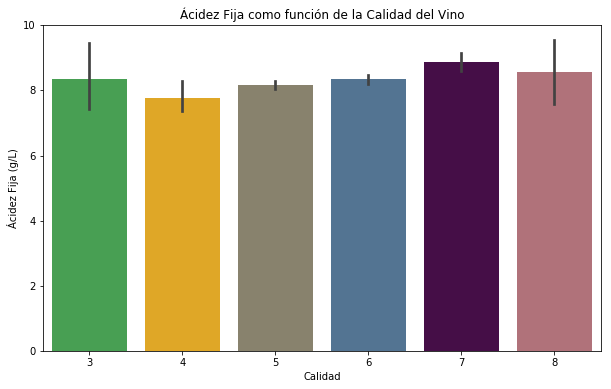

In [0]:
colors = ["#39ad48", "#feb308", "#8d8468", "#49759c", "#4e0550", "#ba6873", "#017371"]
img1 = plt.figure(figsize = (10,6))
sns.barplot(x='Calidad', y='Acidez_Fija', data=wineX, palette=colors)
plt.title("Ácidez Fija como función de la Calidad del Vino")
plt.ylabel("Ácidez Fija (g/L)")
plt.show()   

**Comentarios:** Vemos que la ácidez fija no es de gran aporte para clasificar la calidad. Al principio la gráfica muestra una leve tendencia decreciente, pero vemos que vuelve a subir a mayor calidad (9).


**Ácidez Volátil vs Calidad:**

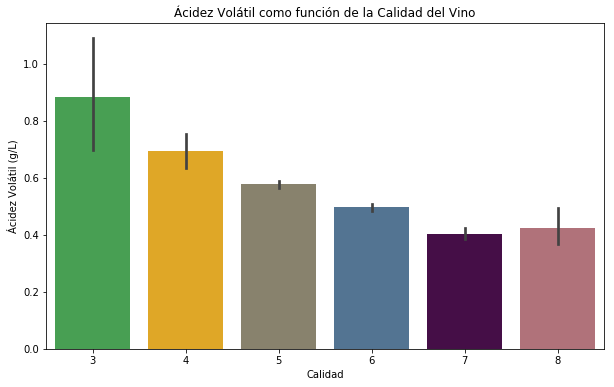

In [0]:
colors = ["#39ad48", "#feb308", "#8d8468", "#49759c", "#4e0550", "#ba6873", "#017371"]
img2 = plt.figure(figsize = (10,6))
sns.barplot(x = 'Calidad', y = 'Acidez_Volatil', data = wineX, palette=colors)
plt.title("Ácidez Volátil como función de la Calidad del Vino")
plt.ylabel("Ácidez Volátil (g/L)")
plt.show()

**Comentarios:** Se observa una tendencia decreciente en la ácidez volátil a medida que aumentamos la calidad.

Este resultado era de esperarse en vinos de buena calidad, ya que ante un aumento de este parámetro tendríamos un efecto negativo con la percepción de aromas y sabores a vinagre. 

La ácidez volátil es fácilmente perceptible a partir de los 0,8 g/L o los 0,9 g/L, según la sensibilidad del catador. Solo los vinos más pobres en calidad ('3') obtuvieron valores superiores a 0.8 g/L.

**Ácido Cítrico vs Calidad:**

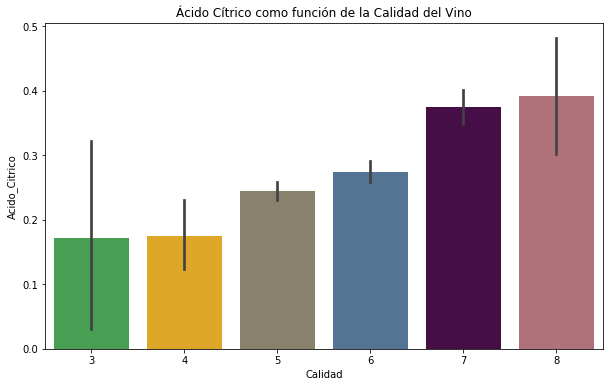

In [0]:
colors = ["#39ad48", "#feb308", "#8d8468", "#49759c", "#4e0550", "#ba6873", "#017371"]
img3 = plt.figure(figsize = (10,6))
sns.barplot(x = 'Calidad', y = 'Acido_Citrico', data = wineX, palette=colors)
plt.title("Ácido Cítrico como función de la Calidad del Vino")
plt.show()


**Comentarios**: La composición del ácido cítrico aumenta a medida que avanzamos en la calidad del vino.

####Azúcar Residual vs Calidad: 

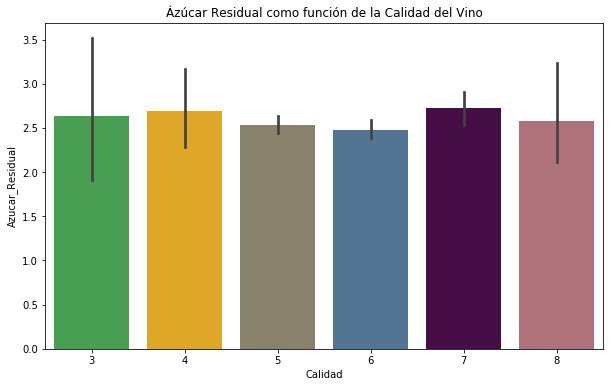

In [0]:
colors = ["#39ad48", "#feb308", "#8d8468", "#49759c", "#4e0550", "#ba6873", "#017371"]
img4 = plt.figure(figsize = (10,6))
sns.barplot(x = 'Calidad', y = 'Azucar_Residual', data = wineX, palette=colors)
plt.title("Ázúcar Residual como función de la Calidad del Vino")
plt.show()

**Comentarios:** Vemos que la Azúcar Residual parece no dar ninguna especificación para clasificar la calidad.

**Cloruro vs Calidad:**

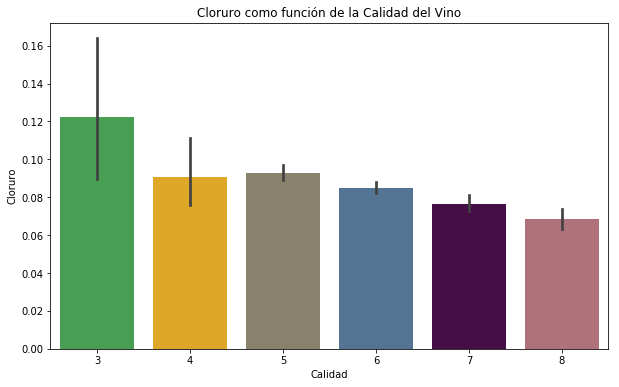

In [0]:
colors = ["#39ad48", "#feb308", "#8d8468", "#49759c", "#4e0550", "#ba6873", "#017371"]
img5 = plt.figure(figsize = (10,6))
sns.barplot(x = 'Calidad', y = 'Cloruro', data = wineX, palette=colors)
plt.title("Cloruro como función de la Calidad del Vino")
plt.show()

**Comentarios**: La composición del cloruro (sal) también disminuye a medida que avanzamos en la calidad del vino.

**Dióxido Azúfre Libre vs Calidad:**

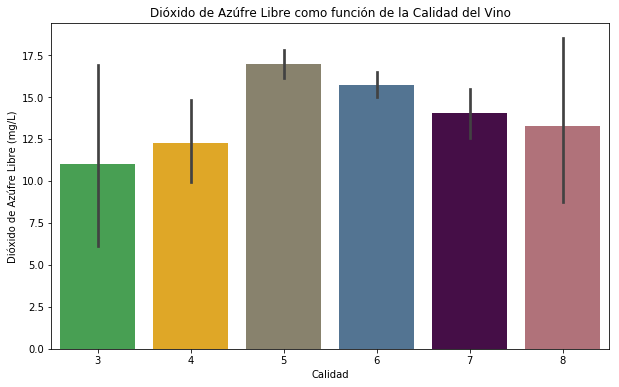

In [0]:
colors = ["#39ad48", "#feb308", "#8d8468", "#49759c", "#4e0550", "#ba6873", "#017371"]
img6 = plt.figure(figsize = (10,6))
sns.barplot(x = 'Calidad', y = 'Dioxido_Azufre_Libre', data = wineX, palette=colors)
plt.title("Dióxido de Azúfre Libre como función de la Calidad del Vino")
plt.ylabel("Dióxido de Azúfre Libre (mg/L)")
plt.show()

**Comentarios**: Para el Dióxido de Azúfre Libre se aprecia como en vinos de calidad media a alta, las concentraciones de esta sustancia son mayores, lo cual es de esperarse sabiendo que en vinos de mayor calidad el uso de esta sustancia es más elevada por su función frente a actividades antibacterianas. 

Esta comprobado que esta sustancia no es nociva para la salud, y que los niveles de anhídrido sulfuroso libres necesarios para frenar la actividad microbiana, oscilan entre los 10 a 20 mg/litro de SO2, libre para los vinos de pH bajo o de 20 a 40 mg/litro de SO2 libre para los vinos de pH elevado. Resultado coherente dado que los vinos analizados en este trabajo son puramente vinos rojos (pH bajo).



**Dióxido de Azúfre Total vs Calidad:**

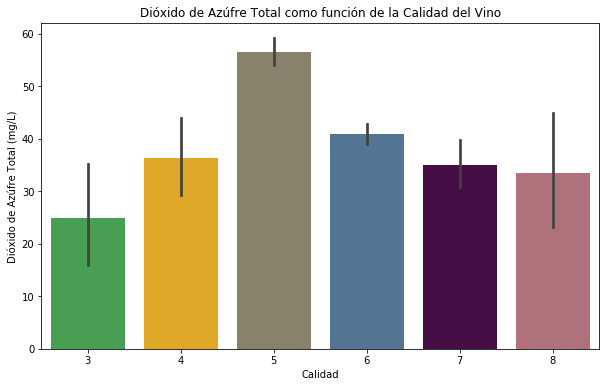

In [0]:
colors = ["#39ad48", "#feb308", "#8d8468", "#49759c", "#4e0550", "#ba6873", "#017371"]
img7 = plt.figure(figsize = (10,6))
sns.barplot(x = 'Calidad', y = 'Dioxido_Azufre_Total', data = wineX, palette=colors)
plt.title("Dióxido de Azúfre Total como función de la Calidad del Vino")
plt.ylabel("Dióxido de Azúfre Total (mg/L)")
plt.show()

**Comentarios:** Al igual que en el gráfico anterior, también vemos que para el Dióxido de Azúfre Total, los vinos de media calidad muestran un contenido superior de esta sustancia.

Dosis muy elevadas de este componente puede alterar el aroma y el sabor del vino.

**Densidad vs Calidad:**

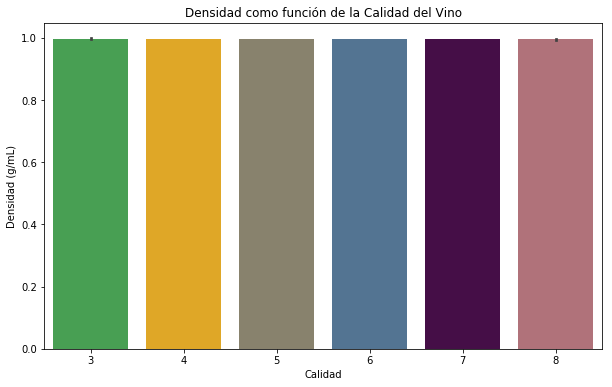

In [0]:
colors = ["#39ad48", "#feb308", "#8d8468", "#49759c", "#4e0550", "#ba6873", "#017371"]
img8 = plt.figure(figsize = (10,6))
sns.barplot(x = 'Calidad', y = 'Densidad', data = wineX, palette=colors)
plt.title("Densidad como función de la Calidad del Vino")
plt.ylabel("Densidad (g/mL)")
plt.show()

Text(0, 0.5, 'Densidad (g/mL)')

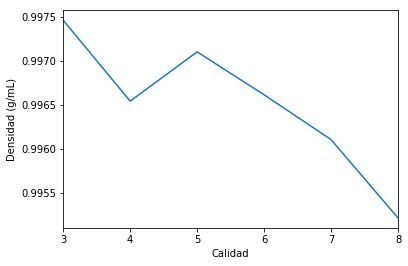

In [0]:
wineX.groupby('Calidad')['Densidad'].mean().plot.line()
plt.ylabel("Densidad (g/mL)")

**Comentarios**: En el gráfico lineal se aprecia mejor como la Densidad tiene una relación inversa con la Calidad. 
Siempre hemos escuchado que la densidad aparente de un vino puede indicarnos su contenido en alcohol, pero sin condicionar su calidad, y por ello es que como criterio de calidad vemos que es importante la densidad, ya que los buenos vinos son aquellos que son ligeros, pero con cuerpo.



**pH vs Calidad:**

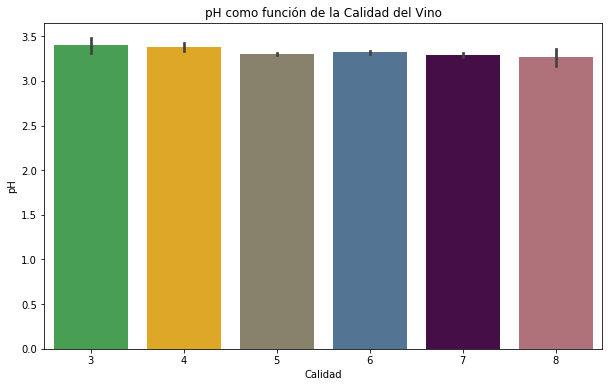

In [0]:
colors = ["#39ad48", "#feb308", "#8d8468", "#49759c", "#4e0550", "#ba6873", "#017371"]
img9 = plt.figure(figsize = (10,6))
sns.barplot(x = 'Calidad', y = 'pH', data = wineX, palette=colors)
plt.title("pH como función de la Calidad del Vino")
plt.show()

Text(0, 0.5, 'pH')

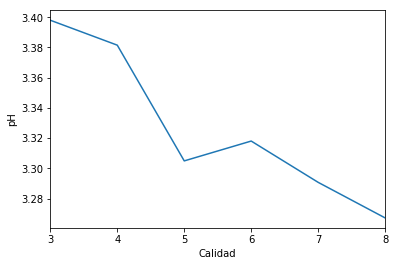

In [0]:
wineX.groupby('Calidad')['pH'].mean().plot.line()
plt.ylabel("pH")

**Comentarios**: El pH es uno de los factores más variables del vino, que resulta del equilibrio de los ácidos que lo componen. Como criterio de calidad es importante porque afecta al sabor del vino, no obstante vemos en nuestra gráfica como los valores de pH son más bajos en los vinos de mayor de calidad superior. 

Generalmente se busca que el pH de un vino blanco se encuentre en aproximadamente 3.0-3.3 mientras que el pH de un vino tinto entre 3.3 y 3.6.

**Sulfatos vs Calidad:**

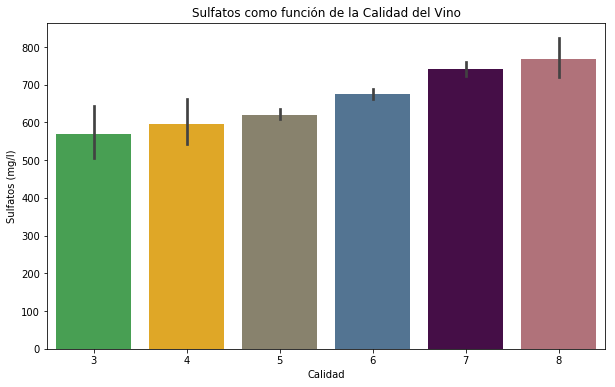

In [0]:
colors = ["#39ad48", "#feb308", "#8d8468", "#49759c", "#4e0550", "#ba6873", "#017371"]

adapt = wineX['Sulfatos']*1000
img10 = plt.figure(figsize = (10,6))
sns.barplot(x = 'Calidad', y = adapt, data = wineX, palette=colors)
plt.title("Sulfatos como función de la Calidad del Vino")
plt.ylabel("Sulfatos (mg/l)")
plt.show()

**Comentarios**: El nivel de sulfatos incrementa a medida que lo hace la calidad. Vemos como los vinos de mayor calidad (9) tiene niveles más elevados de sulfatos. 

Recordemos que los sulfatos son las sales derivadas del ácido sulfúrico utilizadas básicamente en fertilizantes, pesticidas, colorantes, jabones, vidrios, papel fármacos, entre otros; y que aparecen en el agua y por lo tanto en la uva. Una alta concentración de los mismos podría hacer que un agua no fuera de calidad alimentaria. Un agua con una cantidad de sulfatos inferior a 250mg/l se considera en este aspecto un agua de calidad y con valores superiores a 400mg/l insalubre. Y los resultados obtenidos para todas las categorías de calidad estaban por encima de 400mg/l lo cual nos deja mucho para pensar sobre lo que estamos ingiriendo por un vino de alto coste.

####Alcohol vs Calidad: 

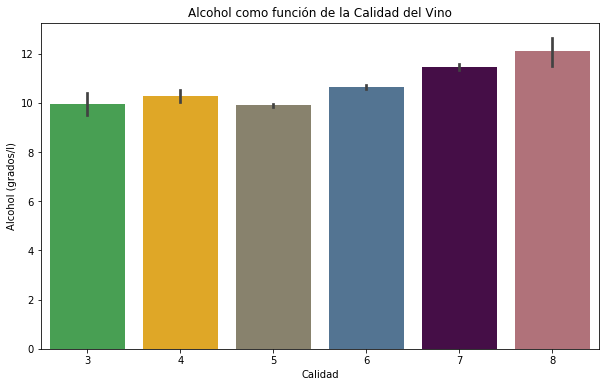

In [0]:
colors = ["#39ad48", "#feb308", "#8d8468", "#49759c", "#4e0550", "#ba6873", "#017371"]

img11 = plt.figure(figsize = (10,6))
sns.barplot(x = 'Calidad', y = 'Alcohol', data = wineX, palette=colors)
plt.title("Alcohol como función de la Calidad del Vino")
plt.ylabel("Alcohol (grados/l)")
plt.show()

**Comentarios**: Vemos que el nivel de alcohol aumenta a medida que aumenta la calidad del vino. Los valores de graduación para los vinos de mayor calidad (8 y 9) son superiores (entre 11º y 13º), tres puntos porcentuales por encima del promedio (10.42º). 


<Figure size 720x72 with 0 Axes>

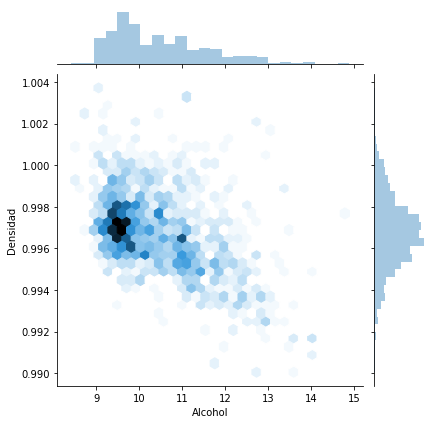

In [0]:
# Graficamos la densidad como función del alcohol para ver mejor su relación
plt.figure(figsize=(10,1))
sns.jointplot(y= 'Densidad', x= 'Alcohol', data = wineX, kind="hex")

**Comentarios:** Como era de esperarse vemos que a mayor grado de alcohol disminuye la densidad del vino, y que la mayoría de los vinos tienen un grado de alcohol entre 9º y 10º con una densidad de mosto 0.9970 g/mL.

### **Mapa de Calor (Correlation Heatmap):**

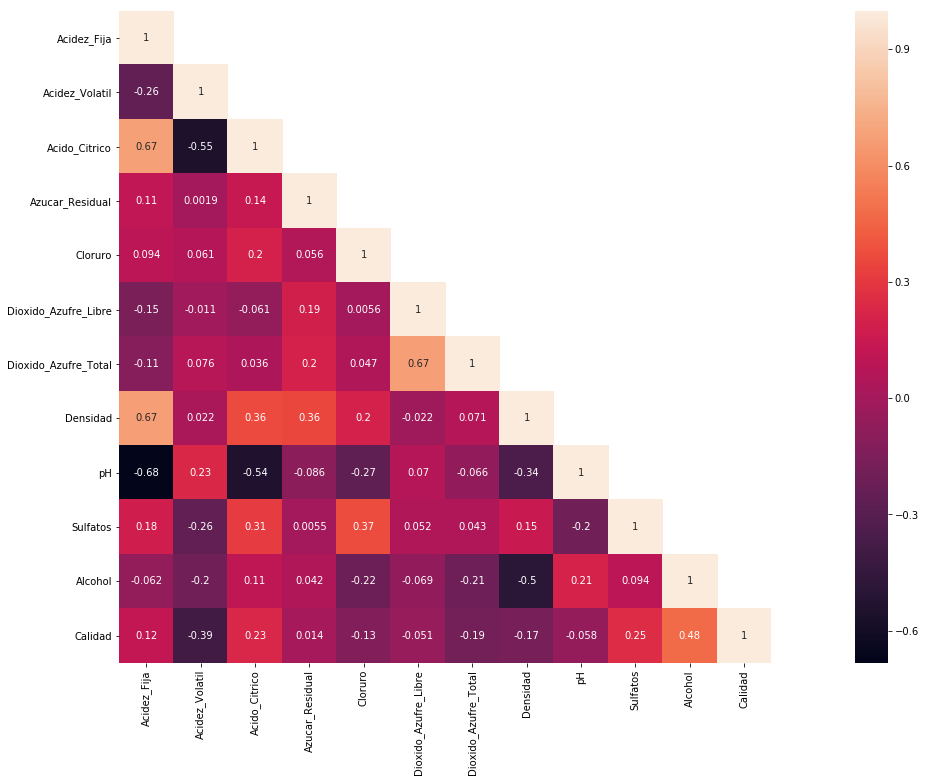

In [0]:
#Pintamos la correlación entre variables
corr_map= wineX.corr()
maska = np.array(corr_map)
maska[np.tril_indices_from(maska)] = False
img12=plt.gcf()
img12.set_size_inches(30,12)
sns.heatmap(data=corr_map,mask=maska,square=True,annot=True,cbar=True)

**Comentarios:** La gráfica de correlación nos dice es que hay algunas características fuertemente correlacionadas entre sí. Desde el punto de vista de incluir estas características en nuestros modelos ML, esto significa que podría haber información redundante. Algunas relaciones que se pueden ver son:

- La variable dependiente "Calidad" del vino está altamente relacionada con el "Alcohol". Más que cualquier otra variable, el "Alcohol" es la que más correlacionada con la "Calidad" en un 0.48, seguida por Sulfatos en 0.25, y Ácido Cítrico en 0.23. 

- Fuertemente relacionadas pero de manera inversa, también tenemos el "Alcohol" y la "Densidad" en -0.5. 

- Otras relaciones que podemos observar en el mapa de calor:

  - El Dióxido de Sulfuro Total está directamente relacionado con el Dióxido de Sulfuro Libre; lo cual era de esperarse porque son complementarios.

  - La Ácidez Fija está relacionada directamente con la Densidad. 
       
  - El Acido Citrico está relacionado directamente con la "Acidez Fija" y de manera inversa con la "Acidez Volatil".

  - El pH está altamente relacionado de manera inversa con el "Ácido Cítrico" y la "Ácidez Fija".

  - El Azúcar Residual, el Dióxido de Azúfre Libre, y el pH, tienen baja correlacion con la calidad.

  - La auto-relación, es decir, de una característica para sí misma es 1 como se esperaba.

- Una opción podría ser eliminar algunas características altamente relacionadas, aunque dado que cada carateristica lleva consigo información única, nos quedaramos con ellas para observar los resultados. 



**A continuación realizaremos una clasificación para la variable de respuesta 'Calidad'. Para ello reemplazamos los valores númericos enteros de la columna 'Calidad' por nuevos 3 valores (1: Mala, 2: Aceptable y 3: Buena). Daremos el límite a la calidad basándonos en la distribución estadística de las muestras.**

In [0]:
wineX['Calidad'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: Calidad, dtype: float64

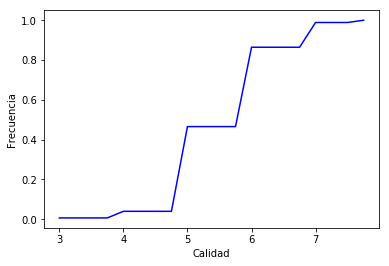

In [0]:
val, base = np.histogram(wineX['Calidad'], bins=20)
Acumulado = np.cumsum(val/wineX.shape[0])
plt.plot(base[:-1], Acumulado, c='blue')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

**Comentario**: Dado que la mediana para la 'Calidad' es 5, y el promedio está entre 5 y 6; clasificaremos el vino como:

'1-Malo' si la calidad es menor o igual a 4,

'2-Aceptable' si la calidad está entre 5 y 6 incluidos, y

'3-Bueno si es mayor o igual a 7.

In [0]:
# Creamos una nueva variable "Categoria" y 
# categorizamos en ella la variable "Calidad" según los parámetros 
# de calidad que hemos definido

categor = []
for i in wineX['Calidad']:
    if i >= 1 and i <= 4:
        categor.append('1')
    elif i >= 5 and i <= 6:
        categor.append('2')
    else:
        categor.append('3')
wineX['Categoria'] = categor


In [0]:
# Echamos un vistazo para ver como a quedado nuestro dataset
wineX.columns

Index(['Acidez_Fija', 'Acidez_Volatil', 'Acido_Citrico', 'Azucar_Residual',
       'Cloruro', 'Dioxido_Azufre_Libre', 'Dioxido_Azufre_Total', 'Densidad',
       'pH', 'Sulfatos', 'Alcohol', 'Calidad', 'Categoria'],
      dtype='object')

In [0]:
wineX['Categoria'].unique()

array(['2', '3', '1'], dtype=object)

In [0]:
wineX.Categoria.value_counts()

2    1319
3     217
1      63
Name: Categoria, dtype: int64

Al crear las 3 nuevas clases, podemos corraborar que las muestras de vino de mayor calidad, tienen niveles más bajos de Ácidez Volátil y niveles altos de contenido en alcohol (la mayoria de muestras entorno a 10º y 12º).

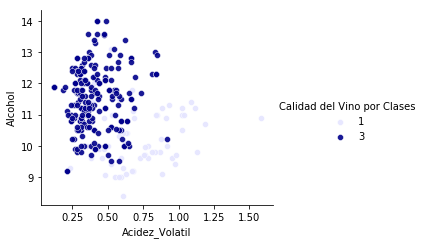

In [0]:
# Análisis bivariado para las características más altamente correlacionadas: Ácidez Volatil y Alcohol.
img13 = sns.FacetGrid(wineX, hue='Categoria', hue_order=['1', '3'],  #para visualizarlo mejor, graficamos solo las muestras para la mejor y peor calidad
                  aspect=1.2, size=3.5, palette=sns.light_palette('darkblue', 2))
img13.map(plt.scatter, 'Acidez_Volatil', 'Alcohol', alpha=0.9, edgecolor='white', linewidth=0.5)
titu = img13.add_legend(title='Calidad del Vino por Clases')   # (1=Bueno, 2=Aceptable, 3=Malo)

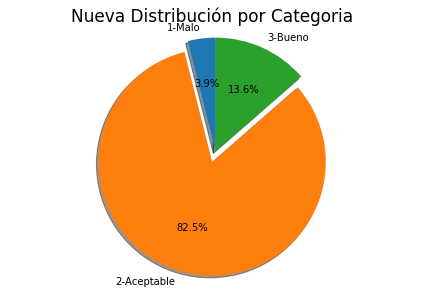

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Párametros para el gráfico de pie
labels = ['1-Malo', '2-Aceptable', '3-Bueno']
sizes = [3.93, 82.48, 13.57]
explode = (0, 0.1, 0,)  

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)


ax.axis('equal')  

plt.tight_layout()
plt.title('Nueva Distribución por Categoria',fontsize=17)
plt.show()

Para el caso del grado de calidad vemos que tenemos un conjunto de datos con predominio de vinos Aceptables (82.5%) sobre los vinos Buenos (13.6%) y Malos (3.9%). Nuestro conjunto de datos es poco equilibrado, lo cual puede llegar a afectar a nuestro modelo, no obstante evaluaremos el rendimiento de nuestro modelo primero sin tomar medidas para el balanceo a fin de posteriormente compararlo con los resultados que se obtienen aplicando alguna técnica para su corrección. 




**Conclusiones:**  De esta segunda fase podemos concluir que, las variables con mayor peso para definir un vino de calidad, son el 'Alcohol', seguido por la 'Ácidez Volátil', y luego la 'Densidad'. Adicionalmente pudimos ver que en comparación con el nivel de calidad deficiente, el nivel de calidad excelente tiene una mayor proporción de vino con alto contenido de alcohol; en promedio, a mayor nivel de calidad del vino, menor acidez volátil y mayor ácido cítrico.

**El dataset que utilizaremos para los desarrollos de para la parte 3 será wineX3**

In [0]:
# Descargamos el fichero tratado en este notebook, 
# con el fin de seguir el tratamiento en el siguiente notebook (Parte 3). 
# Se guarda el fichero wineX3.csv en nuestro directorio local:

wineX.to_csv("/home/dsc/Data/wineX3.csv")

